In [12]:
import os
from PIL import Image, UnidentifiedImageError
import numpy as np
from collections import defaultdict

In [15]:
data_dir = "C:/Users/OWNER/Downloads/SDS-CP028-smart-leaf_Project/SDS-CP028-smart-leaf/submissions/team-members/Samsudeen/Data/FlattenData"
shapes = []
class_counts = defaultdict(int)
removed = []

In [16]:
print("🔍 Verifying image shapes and removing corrupted files...\n")

for class_name in sorted(os.listdir(data_dir)):
    class_path = os.path.join(data_dir, class_name)
    if not os.path.isdir(class_path):
        continue

    for filename in os.listdir(class_path):
        filepath = os.path.join(class_path, filename)

        try:
            with Image.open(filepath) as img:
                img.verify()  # check for corruption

            with Image.open(filepath) as img_check:
                img_check = img_check.convert("RGB")  # ensure RGB
                np_img = np.array(img_check)
                shape = np_img.shape  # (height, width, channels)
                shapes.append((filepath, shape))
                print(f"{filepath} — Shape: {shape}")  # example: (224, 224, 3)

                class_counts[class_name] += 1

        except (UnidentifiedImageError, OSError, ValueError):
            print(f"❌ Removing corrupted file: {filepath}")
            os.remove(filepath)
            removed.append(filepath)


🔍 Verifying image shapes and removing corrupted files...

C:/Users/OWNER/Downloads/SDS-CP028-smart-leaf_Project/SDS-CP028-smart-leaf/submissions/team-members/Samsudeen/Data/FlattenData\Corn___Common_Rust\image (1).JPG — Shape: (256, 256, 3)
C:/Users/OWNER/Downloads/SDS-CP028-smart-leaf_Project/SDS-CP028-smart-leaf/submissions/team-members/Samsudeen/Data/FlattenData\Corn___Common_Rust\image (10).JPG — Shape: (256, 256, 3)
C:/Users/OWNER/Downloads/SDS-CP028-smart-leaf_Project/SDS-CP028-smart-leaf/submissions/team-members/Samsudeen/Data/FlattenData\Corn___Common_Rust\image (100).JPG — Shape: (256, 256, 3)
C:/Users/OWNER/Downloads/SDS-CP028-smart-leaf_Project/SDS-CP028-smart-leaf/submissions/team-members/Samsudeen/Data/FlattenData\Corn___Common_Rust\image (1000).JPG — Shape: (256, 256, 3)
C:/Users/OWNER/Downloads/SDS-CP028-smart-leaf_Project/SDS-CP028-smart-leaf/submissions/team-members/Samsudeen/Data/FlattenData\Corn___Common_Rust\image (1001).JPG — Shape: (256, 256, 3)
C:/Users/OWNER/Dow

In [17]:
print("\n✅ Done checking.")
print(f"🧹 Removed corrupted files: {len(removed)}")

# Optional: print shape summary
print("\n📏 Unique image shapes found:")
unique_shapes = set(shape for _, shape in shapes)
for shape in unique_shapes:
    count = sum(1 for _, s in shapes if s == shape)
    print(f"{shape}: {count} images")


✅ Done checking.
🧹 Removed corrupted files: 0

📏 Unique image shapes found:
(297, 214, 3): 1 images
(273, 195, 3): 1 images
(228, 282, 3): 1 images
(576, 878, 3): 1 images
(772, 984, 3): 1 images
(1017, 1825, 3): 1 images
(829, 648, 3): 1 images
(729, 785, 3): 1 images
(608, 822, 3): 1 images
(697, 966, 3): 1 images
(106, 154, 3): 1 images
(596, 978, 3): 1 images
(69, 178, 3): 1 images
(95, 39, 3): 1 images
(879, 267, 3): 1 images
(413, 1278, 3): 1 images
(988, 470, 3): 1 images
(86, 124, 3): 1 images
(111, 78, 3): 1 images
(1076, 885, 3): 1 images
(130, 336, 3): 1 images
(414, 895, 3): 1 images
(903, 421, 3): 1 images
(977, 1930, 3): 1 images
(91, 444, 3): 1 images
(74, 152, 3): 1 images
(163, 59, 3): 1 images
(148, 108, 3): 1 images
(498, 1503, 3): 1 images
(747, 1194, 3): 1 images
(232, 254, 3): 1 images
(895, 519, 3): 1 images
(105, 333, 3): 1 images
(1126, 1197, 3): 1 images
(24, 42, 3): 1 images
(468, 709, 3): 1 images
(108, 150, 3): 1 images
(459, 279, 3): 1 images
(264, 127, 3

In [18]:
# Optional: display class counts
print("\n📊 Class image counts:")
for cls, count in class_counts.items():
    print(f"{cls}: {count}")


📊 Class image counts:
Corn___Common_Rust: 1192
Corn___Gray_Leaf_Spot: 513
Corn___Healthy: 1162
Corn___Northern_Leaf_Blight: 985
Potato___Early_Blight: 1000
Potato___Healthy: 152
Potato___Late_Blight: 1000
Rice___Brown_Spot: 613
Rice___Healthy: 1488
Rice___Leaf_Blast: 977
Rice___Neck_Blast: 1000
Wheat___Brown_Rust: 902
Wheat___Healthy: 1116
Wheat___Yellow_Rust: 924


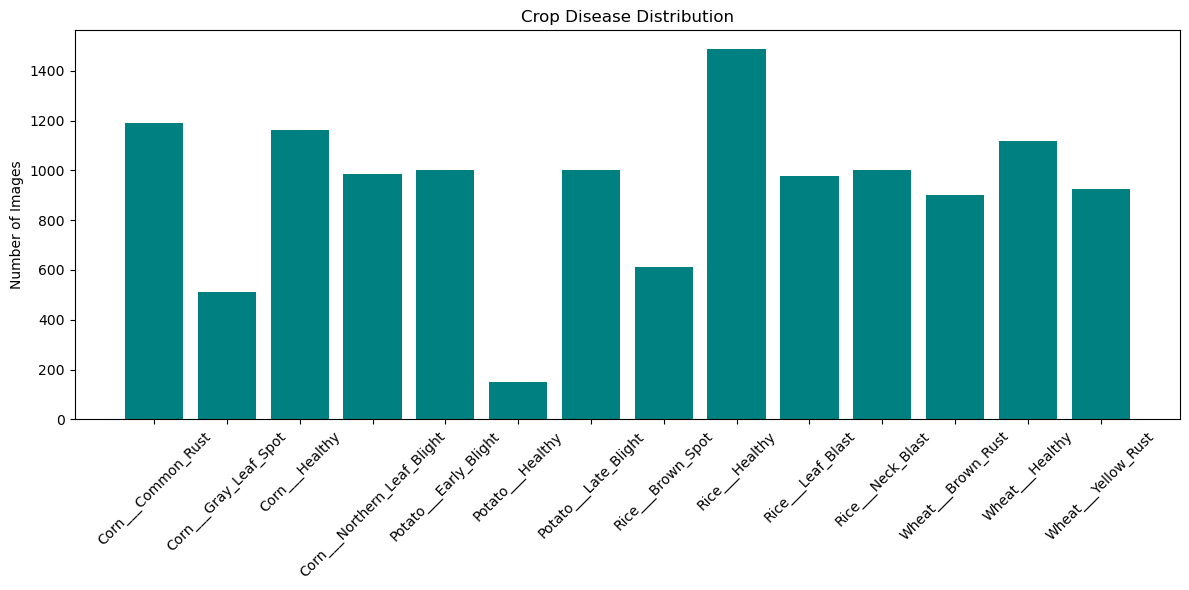

In [19]:
# Plot class distribution
plt.figure(figsize=(12, 6))
plt.bar(class_counts.keys(), class_counts.values(), color='teal')
plt.title("Crop Disease Distribution")
plt.xticks(rotation=45)
plt.ylabel("Number of Images")
plt.tight_layout()
plt.show()
# Save the figure
#plt.savefig("crop_disease_distribution.png", dpi=300) 
#plt.close()  # Close the figure to avoid displaying it in notebooks